# Predicting Car Prices

## Introduction to the Data


In this project we are going to be working on a dataset from the UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/automobile) to make predictions on car prices. The dataset contains the following columns:

- symboling: -3, -2, -1, 0, 1, 2, 3.
- normalized-losses: continuous from 65 to 256.
- make: this includes car brands such as alfa-romero, audi, bmw, chevrolet, dodge, honda etc.
- fuel-type: diesel, gas.
- aspiration: std, turbo.
- num-of-doors: four, two.
- body-style: hardtop, wagon, sedan, hatchback, convertible.
- drive-wheels: 4wd, fwd, rwd.
- engine-location: front, rear.
- wheel-base: continuous from 86.6 120.9.
- length: continuous from 141.1 to 208.1.
- width: continuous from 60.3 to 72.3.
- height: continuous from 47.8 to 59.8.
- curb-weight: continuous from 1488 to 4066.
- engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
- num-of-cylinders: eight, five, four, six, three, twelve, two.
- engine-size: continuous from 61 to 326.
- fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
- bore: continuous from 2.54 to 3.94.
- stroke: continuous from 2.07 to 4.17.
- compression-ratio: continuous from 7 to 23.
- horsepower: continuous from 48 to 288.
- peak-rpm: continuous from 4150 to 6600.
- city-mpg: continuous from 13 to 49.
- highway-mpg: continuous from 16 to 54.
- price: continuous from 5118 to 45400.


Our goal is to demonstrate a proper machine learning work flow by computing the RMSE(Root Mean Squared Error) values of our predictions using different individual features, multiple features and different hyperparameter values. For this project the machine learning model we will be working with is scikit-learn.neighbors KNeighborRegressor and the error metric we will be using is scikit-learn.metrics mean_squared_error. We will also be using scikit-learn cross-validation to perform a cross validation on our dataset and scikit-learn KFold class to split and randomize our dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-darkgrid')
%matplotlib inline

cars=pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


From the cell above we can see that the columns names do not match with the documentation that was given (see above). So in order to fix this we will rename all the coumns so that it will be more clearer to the viewer

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

#we could have also done it as follows:
# cars.columns = ['symboling', 'normalized_losses', 'make','fuel_type', 'aspiration', 'num_of_doors','body_style', 'drive_wheels', 'engine_location',
                #'wheel_base', 'length', 'width', 'height', 
                #'curb_weight', 'engine_type', 'num_of_cylinders', 
                #'engine_size', 'fuel_system', 'bore', 'stroke', 
                #'compression_ratio', 'horsepower', 'peak_rpm', 
                #'city_mpg', 'highway_mpg', 'price']


cars=pd.read_csv('imports-85.data',names=cols)
cars.head()             


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

## Data Cleaning

Despite it showing that there are no null columns, we could see that some of the columns had a value of '?' which is infact a null value. We are going to replace this value with numpy.nan float value.

In [4]:
cars.replace('?',np.nan)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,NaN


To make the ML model a bit easier we will seperate the dataframe to numerical and categorricl dataframes

In [5]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars=numeric_cars.replace('?',np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#converting the numeric values into a float type

numeric_cars=numeric_cars.astype(float)
#checking if it now a float values
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [7]:
#checking the number of missing values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As we see above we have some missing values that we need to deal with. Te way we can deal with these missing values are as follows:


- Replace the missing values using the average values from that column.
- Drop the rows entirely (especially if other columns in those rows have missing values).
- Drop the column entirely

For the price column we will remove the rows with the missing values. The reason why we are removing those rows is that the price column is a targeted column in which we will use a machine learning algorthim on.Since the price column missing values are less than 2% we can remove those rows and it won't affect the overall performance of the model.

We coould have also just repalced these values with the mean value of this column.

In [8]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [9]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For the remaining columns we can drop the ones that are also less than 2% of the data or we can just replace the values with the average  of those columns'


In [10]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [11]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that we have dealt with the missing values we will now normalize all the columns in the numeric dataframe. The reason for doing this is to ensure that extremely large values do not affect the performance of our model.

In [12]:
#normalizing the dataframe
norm_df=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())

In [13]:
norm_df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


## Univariate Model Testing
We are going to test the model performance using just one feature. We are going to create a fuction that takes in a list of the column/columns we want to train, the name of the column we want to predict and a DataFrame.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(cols, col2, df):
    ''' Predict a variable and calculate RMSE value.
    
    This function takes in a DataFrame, randomizes i 
    and then uses the `scikit-learn.neighbors KNeighborRegressor` class
    to predict a variable and also uses `scikit-learn.metrics.mean_square_error`
    to calculate the RMSE value by taking the squareroot of the mean square error.
    
    Parameters
    ----------
    cols : list
         list of columns in DataFrame to train.
    col2 : str
         name of target column in DataFrame.
    df : DataFrame
    
    Returns
    -------
    predictions : numpy.ndarray
               numpy array with the predicted resluts of target column.
    rmse : float
         error metric used for evaluation of the prediction.
    '''
    np.random.seed(1) # random seed set to one so shuffling can be recreated
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    split_index = int(df.shape[0] / 2) # splits the DataFrame index in 2
    train_df = rand_df.iloc[:split_index]
    test_df = rand_df.iloc[split_index:]
    
    model = KNeighborsRegressor()
    model.fit(train_df[cols], train_df[col2])
    predictions = model.predict(test_df[cols])
    mse = mean_squared_error(test_df[col2], predictions)
    rmse = np.sqrt(mse)
    
    return rmse, predictions

In [15]:
all_features = norm_df.columns.drop('price') # dropping the price column as it is our target column
rmse_dict = dict()

for col in all_features:
    rmse, predictions = knn_train_test([col], 'price', norm_df)
    rmse_dict[col] = rmse 

rmse_dict

{'bore': 0.1683289753409954,
 'city-mpg': 0.1183263617767274,
 'compression-rate': 0.1641133050285271,
 'curb-weight': 0.109257689657741,
 'engine-size': 0.08039478748939273,
 'height': 0.20218561746347616,
 'highway-mpg': 0.11494034056372711,
 'horsepower': 0.10021939608643465,
 'length': 0.13473017627815678,
 'normalized-losses': 0.1819720384646851,
 'peak-rpm': 0.19108931275590788,
 'stroke': 0.19876196675058594,
 'wheel-base': 0.13558298986825523,
 'width': 0.11678870437675352}

In [16]:
uni_rmse = pd.Series(rmse_dict) # converts uni_rmse dict to a pandas Series
uni_rmse.sort_values() # sort values in the series in ascending order

engine-size          0.080395
horsepower           0.100219
curb-weight          0.109258
highway-mpg          0.114940
width                0.116789
city-mpg             0.118326
length               0.134730
wheel-base           0.135583
compression-rate     0.164113
bore                 0.168329
normalized-losses    0.181972
peak-rpm             0.191089
stroke               0.198762
height               0.202186
dtype: float64

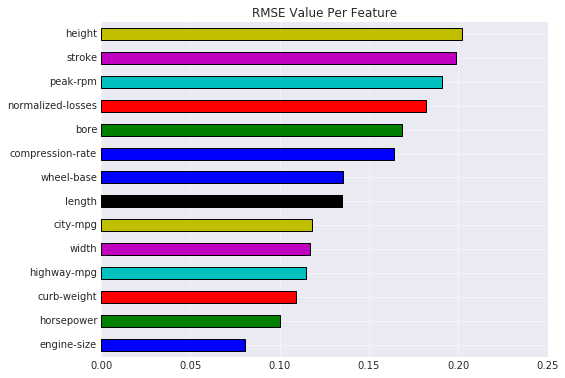

In [17]:
uni_rmse.sort_values().plot.barh(figsize=(8, 6)) # horizontal bar plot of uni_rmse Series
plt.title('RMSE Value Per Feature')
plt.show()

After computing the RMSE value for each of the individual features, we can see that the top 5 features were the:

1. engine_size
2. horsepower
3. curb-weight
4. highway-mpg
5. widith

## Hyperparameter Optimisation
We are going to vary the k value of our model between 1 and 9 and see how it performs at each k value. We will compute the average RMSE values of each of the features for each of the k values.

In [18]:
def knn_train_test_multi(cols, col2, df, k=5):
    ''' Predict a variable and calculate RMSE value.
    
     This function takes in a list of columns to train, the target column to predict, and a DataFrame, 
     randomizes the index and then uses the `scikit-learn.neighbors KNeighborRegressor` class
     to predict a variable and also uses `scikit-learn.metrics.mean_square_error`
     to calculate the RMSE value by taking the squareroot of the mean square error.
    
    Parameters
    ----------
    cols : list
         list of columns in DataFrame to train.
    col2 : str
         name of target column in DataFrame.
    df : DataFrame
    n : int, default 5
       number of n_neighbors.
    
    Returns
    -------
    predictions : numpy.ndarray
               numpy array with the predicted values of target column.
    rmse : float
         squareroot of mean_squared_error.
    '''
    np.random.seed(1) # random seed set to one so shuffling can be recreated
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    split_index = int(df.shape[0] / 2) # split the DataFrame index in 2
    train_df = rand_df.iloc[:split_index]
    test_df = rand_df.iloc[split_index:]
    
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(train_df[cols], train_df[col2])
    predictions = model.predict(test_df[cols])
    mse = mean_squared_error(test_df[col2], predictions)
    rmse = np.sqrt(mse)
    
    return rmse, predictions

In [19]:
n_neighbors = [1, 3, 5, 7, 9]
rmse_values = dict()

for col in all_features:
    values_dict = {}
    for k in n_neighbors:
        rmse, predictions = knn_train_test_multi([col], 'price', norm_df, k)
        values_dict[k] = rmse
        
    rmse_values[col] = values_dict
    
    
rmse_values

{'bore': {1: 0.2135591203143007,
  3: 0.17338363262700254,
  5: 0.1683289753409954,
  7: 0.17074867101736585,
  9: 0.1704684102586369},
 'city-mpg': {1: 0.1464957940110909,
  3: 0.1153554046156386,
  5: 0.1183263617767274,
  7: 0.12989729988995868,
  9: 0.13567373746406666},
 'compression-rate': {1: 0.2007647422303533,
  3: 0.18308583698868866,
  5: 0.1641133050285271,
  7: 0.167141683206929,
  9: 0.17438273982084887},
 'curb-weight': {1: 0.13068592003274115,
  3: 0.12467896360054696,
  5: 0.109257689657741,
  7: 0.10750727631244858,
  9: 0.11499042933455146},
 'engine-size': {1: 0.08089186500164348,
  3: 0.07051692581409814,
  5: 0.08039478748939273,
  7: 0.08845357167609393,
  9: 0.09512497927074318},
 'height': {1: 0.22104280960132835,
  3: 0.20549152581911342,
  5: 0.20218561746347616,
  7: 0.19064589951824074,
  9: 0.19390884422104737},
 'highway-mpg': {1: 0.14958529781839874,
  3: 0.11462452261031114,
  5: 0.11494034056372711,
  7: 0.11906214786224484,
  9: 0.1310351535910329},
 

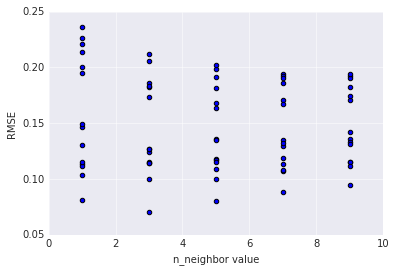

In [20]:
for k,v in rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
 # displays a scatter plot of the rmse values of the different features for n number of neighbors 
    plt.scatter(x,y,)
    plt.xlabel('n_neighbor value')
    plt.ylabel('RMSE')

There is no clear pattern to how the model behaves as we vary the values for k. For most features the RMSE values decreased as we varied k from 1 - 2, while in some features the RMSE increased as we varied k from 1 - 2.

## Multivariate Model

In our previous testing we used just one feature. Here we are going to use multiple features from the 5 best performing features in the last test. We are going to see how the model performs when we train it with the 2 best features up to the 5 best features.

In [21]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in rmse_values.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          0.083076
horsepower           0.104746
width                0.114664
curb-weight          0.117424
highway-mpg          0.125849
length               0.128504
city-mpg             0.129150
wheel-base           0.130391
compression-rate     0.177898
bore                 0.179298
normalized-losses    0.189276
stroke               0.198606
peak-rpm             0.201563
height               0.202655
dtype: float64


In [22]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        norm_df
    )

k_rmse_results  

{'2 best features': {5: 0.0732307662906022},
 '3 best features': {5: 0.08889175475877172},
 '4 best features': {5: 0.08657318200007534},
 '5 best features': {5: 0.08465858232933272},
 '6 best features': {5: 0.08635397671710786}}

## Hyperparameter Optimisation

We are going to vary the k value between 1 - 25 for the 2 best , 3 best and 5 best features

In [23]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 2832.6762159757077,
  2: 2592.760534757126,
  3: 2620.327691572396,
  4: 2824.6258095735284,
  5: 2925.00464591321,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.44037715117,
  10: 4066.955641740046,
  11: 4162.831387739917,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.677524353425,
  15: 4384.634184404111,
  16: 4477.339380724929,
  17: 4542.7101905616355,
  18: 4675.594058904271,
  19: 4696.93629950144,
  20: 4684.844437694387,
  21: 4744.078137218994,
  22: 4779.969895724662,
  23: 4826.869687492047,
  24: 4881.349005863175},
 '3 best features': {1: 2861.158731550683,
  2: 2644.428153665928,
  3: 2681.7457878865184,
  4: 2722.280458854013,
  5: 2901.007254846714,
  6: 3079.0995987640463,
  7: 3210.5192759138426,
  8: 3485.8385181559474,
  9: 3782.798641745253,
  10: 4029.356670465123,
  11: 4133.471835231293,
  12: 4225.481801502254,
  13: 4232.577904328598,
  14: 4309.041242789048,
  15: 4357.0171849772

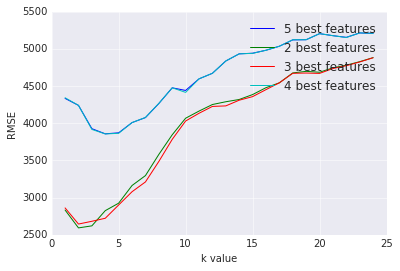

In [25]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

The RMSE values dropped as the n_neighbor value varied from 1 - 2 and then alternated a little bit before climbing steadily as the value for the n_neighbor increased.

## Conclusion
While our dataset was not large enough to make a concrete prediction, it was valuable process in learning a machine learning work flow. One of the things learned here is that we can improve the performance of the model by either increasing the number of features we train the model on or by varying the hyperparameters. It is also important to note that training the model on more features or increasing the number of hyperparameters(n_neighbours) does not neccesarily result in better performance of the model.